<center>
    <h1>A simple logistic regression</h1>
<center>

# 1. Setup

In [1]:
# Import base librairies
import sys
from pathlib import Path
from IPython.display import display, Latex

# Import scientific librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Add project directory to kernel paths
sys.path.append("../..")

In [2]:
# Import custom functions
from src.visualization.plot_lib import default_viz
from src.data.file_manager import fetch_full_dataset, check_full_dataset, ProjectInfo

zoidbergInfo = ProjectInfo()

# Set default graphics visualization
%matplotlib inline
default_viz()

# Latex font
plt.rcParams["text.usetex"]=True

# Set seed for numpy
np.random.seed(42)

# 2. Simple dataset

Let's create a simple dataset for a binary classification with 2 features which is linearly separable :

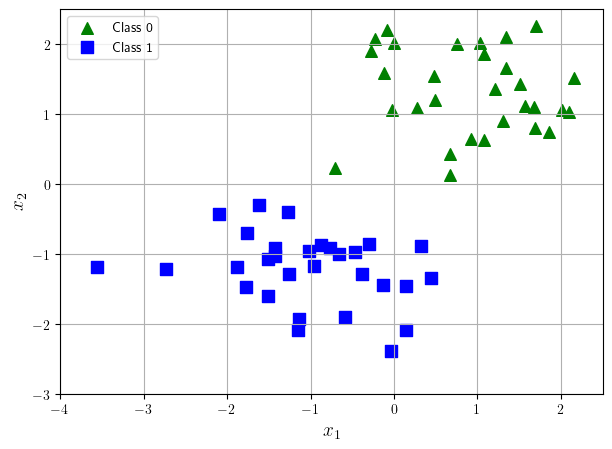

In [3]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples = 60,
                           n_features=2,
                           n_informative=2,
                           n_redundant=0,
                           n_repeated=0,
                           n_clusters_per_class=1,
                           class_sep=1.2,
                           hypercube=True,
                           random_state=34)

def plot_dataset(save_fig=False):
    plt.scatter(X[y==0,0],X[y==0,1],color='g',marker='^',s=70,label='Class 0')
    plt.scatter(X[y==1,0],X[y==1,1],color='b',marker='s',s=70,label='Class 1')
    plt.xlabel(r'$x_1$', fontsize=14)
    plt.ylabel(r'$x_2$', fontsize=14)
    plt.grid()
    plt.xlim([-4,2.5])
    plt.ylim([-3,2.5])
    plt.legend(loc='upper left')
    if save_fig:
        plt.savefig(zoidbergInfo.resource_dir / 'binaryclassdata.png')

plot_dataset(save_fig=True)

# 3. Gradient Descent

## 3.1 Computing GD and plotting decision boundaries

In [4]:
m = len(y)
n = X.shape[1]

X_bias = np.c_[X,np.ones(m)]

def sigmoid(x):
    return 1./(1.+np.exp(-x))

def hyp(theta, x):
    return sigmoid(x @ theta)

def J(theta,X,y):
    return -1/m*(y@np.log(hyp(theta,X)) + (np.ones(m)-y)@np.log(np.ones(m)-hyp(theta,X)))

In [5]:
def gradient_descent(X, y, learning_rate=1, epoch=1000, diff_step=0.01, theta_0=None):
    if not theta_0:
        theta = np.random.rand(X.shape[1])
    else : 
        theta = np.array(theta_0)
    theta_record = [np.copy(theta)]
    for k in range(epoch):
        for dim in range(X.shape[1]):
            dtheta = np.zeros(X.shape[1])
            dtheta[dim] = diff_step
            dJ = (J(theta + dtheta, X, y)-J(theta, X, y))/diff_step
            theta[dim] = theta[dim] - learning_rate*dJ
        theta_record.append(np.copy(theta))
    return np.array(theta_record)

theta_record = gradient_descent(X_bias,y)

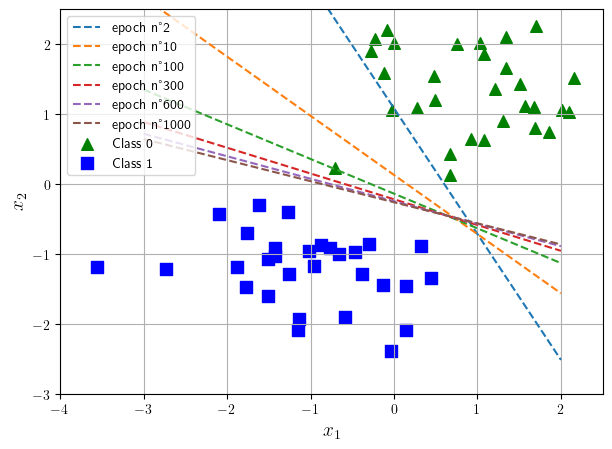

In [6]:
x = np.linspace(-3,2,200)

def line(theta,x):
    return -theta[0]/theta[1]*x + -theta[2]/theta[1]

for epoch in [2,10,100,300,600,1000]:
    plt.plot(x,line(theta_record[epoch,:],x),'--',label=f'epoch n°{epoch}')
plot_dataset()
plt.savefig(zoidbergInfo.resource_dir / 'binaryclassdecision.png')

## 3.2 Plotting Risk Countour plot

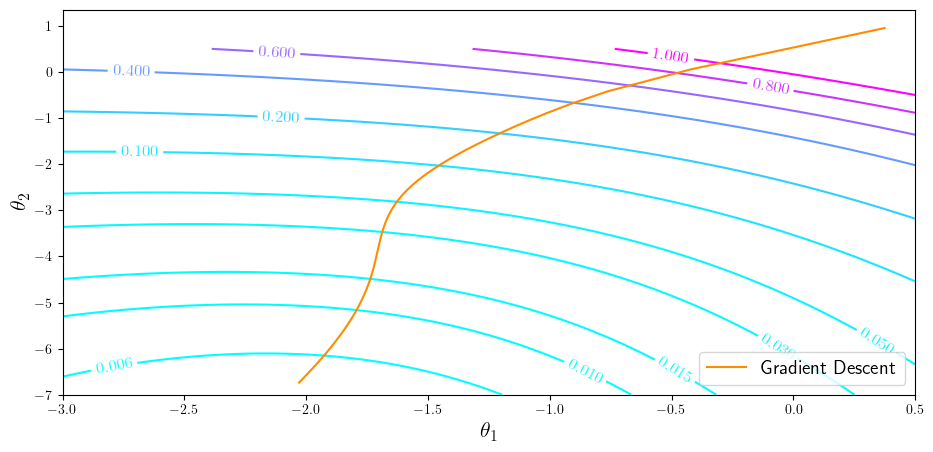

In [7]:
def J2D(theta_1,theta_2):
    return J(np.array([theta_1,theta_2,theta_record[-1,2]]),X_bias,y)

x1 = np.linspace(-3, 0.5, 200)
x2 = np.linspace(-7, 0.5, 200)
X1, X2 = np.meshgrid(x1, x2)
Z = [J2D(x1_coord,x2_coord) for x1_coord, x2_coord in np.c_[X1.flatten(),X2.flatten()]]
Z = np.array(Z).reshape(X1.shape)

clines = np.array([J2D(x1_coord,x2_coord) for x1_coord, x2_coord in theta_record[:,:2]])
clines = np.array([0.006,0.01,0.015,0.03,0.05,0.1,0.2,0.4,0.6,0.8,1.])

plt.figure(figsize=(11,5))
contours = plt.contour(X1, X2, Z, clines, cmap='cool')
plt.clabel(contours, inline = True, fontsize = 12)
plt.plot(theta_record[:,0],theta_record[:,1], 'darkorange',label='Gradient Descent')
plt.legend(loc='lower right', fontsize=14)
plt.xlabel(r'$\theta_1$', fontsize = 16)
plt.ylabel(r'$\theta_2$', fontsize = 16)
plt.savefig(zoidbergInfo.resource_dir / 'binaryclassgd.png')